# Separating the effect of reward from corrective feedback during learning in patients with Parkinson’s disease

Parkinson’s disease (PD) is associated with procedural learning deficits. Nonetheless, studies have demonstrated that reward-related learning is comparable between patients with PD and controls (Bódi et al., Brain, 132(9), 2385–2395, 2009; Frank, Seeberger, & O’Reilly, Science, 306(5703), 1940–1943, 2004; Palminteri et al., Proceedings of the National Academy of Sciences of the United States of America, 106(45), 19179–19184, 2009). However, because these studies do not separate the effect of reward from the effect of practice, it is difficult to determine whether the effect of reward on learning is distinct from the effect of corrective feedback on learning. Thus, it is unknown whether these group differences in learning are due to reward processing or learning in general. Here, we compared the performance of medicated PD patients to demographically matched healthy controls (HCs) on a task where the effect of reward can be examined separately from the effect of practice. We found that patients with PD showed significantly less reward-related learning improvements compared to HCs. In addition, stronger learning of rewarded associations over unrewarded associations was significantly correlated with smaller skin-conductance responses for HCs but not PD patients. These results demonstrate that when separating the effect of reward from the effect of corrective feedback, PD patients do not benefit from reward.

Experimental Design 10 Blocks: Training (8 blocks) Transfer (1 block) Questionnaire (1 block)

Hypothesis: Patients with PD will show a significantly lower effect of reward on learning than comparisons.

Participants responded to a pair of stimuli (faces) shown on a computer screen with either the right index or middle finger. During the eight training blocks, half of the  pairs yielded a reward (money) if the participant responded with the correct answer within the 5 second trial limit. The remaining pairs only yielded positive feedback ("correct") if performed correctly within the time limit. Incorrect or late repsonses yielded negative feedback ("incorrect"). The sole transfer block was identical to the training blocks except that feedback and rewards were withheld. Following the transfer block, participants were presented with an explicit memory questionnaire, which included two parts. For the first part, participants were asked to judge their confidence identifying which pairs were likely to yield rewards on a scale between 0 (no confidence) and 9 (full confidence). For the second part, participants were asked to label each stimulus pair as either rewarded or unrewarded and the number of correct responses (out of 8) was recorded.

The data (Reward_Learning_and_PD.csv) and code (Reward_Learning_and_PD.ipynb) provided are intended to be used in a Jupyter notebook on Google Colab.


## Data Dictionary
| Column | Definition |
| ------ | ---------- |
| Subject | Participant ID |
| Group | Normal Comparisons (NC) or patients with Parkinson's disease (PD) |
| rmapping | Counterbalancing group related to mapping of responses to stimuli |
| CB | Counterbalancing group that includes rmapping and mapping of stimulus sets to screen side (left or right) |
| RT | Time (in milliseconds) to respond on each trial |
| Acc | Binary variable (0 or 1) indicating the accuracy of the repsonse |
| Block | Experiment block where (2 = practice block, 3-10 = training blocks with rewards, 11 = transfer block with no rewards, 12 = explicit memory questionnaire) |
| Trial | Trial number for each block |
| F1 | Stimulus picture presented on the left side of the screen |
| F2 | Stimulus picture presented on the right side of the screen |
| Resp | Participant response (1 or 2) |
| Pair | Two digit number combining the stimulus numbers for the left and right pictures |
| CResp | Correct response for each trial |
| RewardType | Variable indicating whether the pair of pictures shown will yeild a monetary reward if the participant is correct during the training blocks (0 or 1) |
| Rewarded | Variable indicating whether the participant received a reward on that trial (0 or 1) |
| PrevReward | Indicates whether the participant received a reward on the previous trial (0 or 1) |
| AfterReward | Indicates the RewardType of the previous trial stimulus pair (0 or 1) |
| PrevAcc | Indicates the accuracy of the previous trial |
| GoodFast | Indicates whether the response time of the trial is acceptable (above 300 ms and below 2000 ms; 0 or 1) |
| Repeats | Indicates whether the current trial includes the same pair of stimuli as the previous trial |
| Useable | Indicates whether the current and previous trial were performed accurately, within the 300-2000 ms window, and were not repeats (0 or 1). |
| Qpair | Stimulus pair shown during the explicit memory questionnaire. |
| Qconf | Participant's self-reported confidence (from 0 to 9) in identifying stimulus pairs that were rewarded during training, where 0 equals no confidence and 9 indicates full confidence.  |
| QRecall | Accuracy on recall phase of explicit memory questionnaire (8 total trials per participant; 0 or 1) |
| QRespQ | Response (y or n) on recall phase of explicit memory questionnaire. |
| Composite Awareness | Metric of participant's explicit memory for rewarded stimulus pairs (ranges from 0 to 2, where 0 equals poor explicit memory and 2 equals full explicit memory) |
| Drop | Indicates participants whose performance was perfect and thus impossible to measure a reward effect. It is recommended that these subjects be dropped from the analysis. |
| WM | Score from Digits backwards working memory task (max score = 15) |
| Med_Split | Variable dividing both groups (NC and PD) into two subgroups, where 1 indicates above median accuracy on transfer block and -1 indicates below median accuracy |

## Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries to help with statistical analysis
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Reading the Data into a DataFrame

In [3]:
df = pd.read_csv('~/Desktop/Reward_Learning_and_PD.csv')
df_nr = df.copy()

In [4]:
# Drop participants with perfect transfer accuracy (drop = 1).

''' These participants were dropped because a reward effect
(performance differences between rewarded and unrewarded pairs)
could not be accurately measured. '''

df_nr = df_nr[df_nr['Drop'] == 0]

In [5]:
# First five rows
df_nr.head()

,Subject,Group,Sex,rmapping,CB,RT,Acc,Block,Trial,F1,...,Repeats,Useable,Qpair,Qconf,QRecall,QRespQ,Composite Awareness,Drop,WM,Med_Split
0,111,NC,2,8,15,NaN,NaN,1,0,0,...,0,0,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
1,111,NC,2,8,15,NaN,NaN,1,0,0,...,1,0,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
2,111,NC,2,8,15,2694.0,1.0,2,1,Face2.jpg,...,0,1,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
3,111,NC,2,8,15,2372.0,1.0,2,2,Face3.jpg,...,0,1,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
4,111,NC,2,8,15,1921.0,0.0,2,3,Face2.jpg,...,0,1,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0


In [6]:
# Last five rows
df_nr.tail()

,Subject,Group,Sex,rmapping,CB,RT,Acc,Block,Trial,F1,...,Repeats,Useable,Qpair,Qconf,QRecall,QRespQ,Composite Awareness,Drop,WM,Med_Split
12900,228,PD,1,7,4,NaN,NaN,12,4,Face7.jpg,...,0,0,73.0,0.0,0.0,y,0.5,0.0,9,-1.0
12901,228,PD,1,7,4,NaN,NaN,12,5,Face7.jpg,...,0,0,71.0,0.0,0.0,n,0.5,0.0,9,-1.0
12902,228,PD,1,7,4,NaN,NaN,12,6,Face6.jpg,...,0,0,62.0,0.0,0.0,n,0.5,0.0,9,-1.0
12903,228,PD,1,7,4,NaN,NaN,12,7,Face8.jpg,...,0,0,81.0,0.0,1.0,n,0.5,0.0,9,-1.0
12904,228,PD,1,7,4,NaN,NaN,12,8,Face8.jpg,...,0,0,83.0,0.0,1.0,y,0.5,0.0,9,-1.0


In [7]:
# Data frame shape
print("There are ", df_nr.shape[0], " rows and ", df_nr.shape[1], " columns in the dataset.", sep = "")

There are 11479 rows and 30 columns in the dataset.


In [8]:
# Data frame information
df_nr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11479 entries, 0 to 12904
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Subject              11479 non-null  int64  
 1   Group                11479 non-null  object 
 2   Sex                  11479 non-null  int64  
 3   rmapping             11479 non-null  int64  
 4   CB                   11479 non-null  int64  
 5   RT                   11190 non-null  float64
 6   Acc                  11190 non-null  float64
 7   Block                11479 non-null  int64  
 8   Trial                11479 non-null  int64  
 9   F1                   11479 non-null  object 
 10  F2                   11479 non-null  object 
 11  Resp                 11127 non-null  float64
 12  Pair                 11445 non-null  float64
 13  CResp                11190 non-null  float64
 14  RewardType           11479 non-null  int64  
 15  Rewarded             11479 non-null  int6

In [9]:
# Statistical summary
df_nr.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject,11479.0,160.029445,48.947116,102.00,112.0,200.000000,208.000000,228.000000
Sex,11479.0,1.468333,0.499018,1.00,1.0,1.000000,2.000000,2.000000
rmapping,11479.0,4.497169,2.290112,1.00,2.0,4.000000,6.000000,8.000000
CB,11479.0,8.494294,4.608051,1.00,4.0,8.000000,12.000000,16.000000
RT,11190.0,1886.892583,824.317958,0.00,1277.0,1729.000000,2341.750000,4981.000000
Acc,11190.0,0.587489,0.492308,0.00,0.0,1.000000,1.000000,1.000000
Block,11479.0,6.484363,3.235230,1.00,3.0,6.000000,9.000000,12.000000
Trial,11479.0,19.077359,13.047046,0.00,9.0,18.000000,26.500000,60.000000
Resp,11127.0,1.479554,0.499604,1.00,1.0,1.000000,2.000000,2.000000
Pair,11445.0,49.536217,21.270425,15.00,35.0,51.000000,64.000000,84.000000


In [10]:
# Check for null values
print(df_nr.isnull().sum())
print("There are", df_nr.isnull().sum().sum(), "null values.")

# NOTES: There are 289 missing RT, accuracy, CResp, and Resp values that
#        correspond to the questionnaire, where RT was not measured.
#
#        There are an additional 63 missing resp values (352 total)
#        corresponding to trials with no responses.
#
#        There are 34 pair values missing because no pairs were shown during
#        the two Block 1 trials. Block 1 was omitted.
#
#        There are 11224 Qpair, Qconf, QRecall, and QRespQ values missing
#        because these variables were not measured outside of the explicit
#        memory questionnaire.

Subject                    0
Group                      0
Sex                        0
rmapping                   0
CB                         0
RT                       289
Acc                      289
Block                      0
Trial                      0
F1                         0
F2                         0
Resp                     352
Pair                      34
CResp                    289
RewardType                 0
Rewarded                   0
PrevReward                 0
AfterReward                0
PrevAcc                    0
GoodFast                   0
Repeats                    0
Useable                    0
Qpair                  11224
Qconf                  11224
QRecall                11224
QRespQ                 11224
Composite Awareness        0
Drop                       0
WM                         0
Med_Split                  0
dtype: int64
There are 46149 null values.


In [11]:
# Check for duplicated rows
print("There are", df_nr.duplicated().sum(), "duplicated rows.") # No duplicate rows

There are 0 duplicated rows.


In [12]:
# Count of subjects, groups, and subgroups
# Subjects
print("-" * 50, "Participants", "-"* 46)
print("There are", df_nr['Subject'].nunique(), "unique participants in the dataset.")

print("-" * 50, "Groups", "-"* 52)
print("There are, ", df_nr['Group'].nunique(), " groups in the dataset.", sep='')
print("\tThis includes ", df_nr[df_nr['Group'] == 'NC'].nunique()['Subject'], " healthy controls and ",
      df_nr[df_nr['Group'] == 'PD'].nunique()['Subject'], " patients with PD.", sep='')

print("-" * 50, "Subgroups", "-"* 49)
print("There are, ", df_nr['Med_Split'].nunique(), " sub-groups in the dataset.", sep='')
print("\tThis includes ", df_nr[df_nr['Med_Split'] == 1]['Subject'].nunique(), " participants with higher overall group accuracy and ",
      df_nr[df_nr['Med_Split'] == -1]['Subject'].nunique(), " participants with lower overall \n\tgroup accuracy.", sep='')


-------------------------------------------------- Participants ----------------------------------------------
There are 32 unique participants in the dataset.
-------------------------------------------------- Groups ----------------------------------------------------
There are, 2 groups in the dataset.
	This includes 16 healthy controls and 16 patients with PD.
-------------------------------------------------- Subgroups -------------------------------------------------
There are, 2 sub-groups in the dataset.
	This includes 15 participants with higher overall group accuracy and 17 participants with lower overall 
	group accuracy.


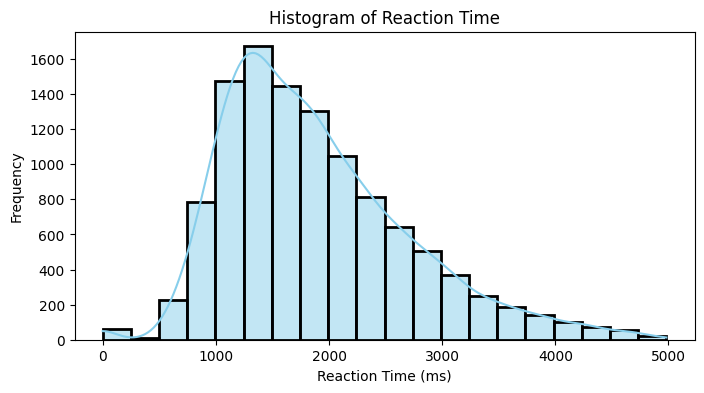

------------------------------------------------------------------------------------


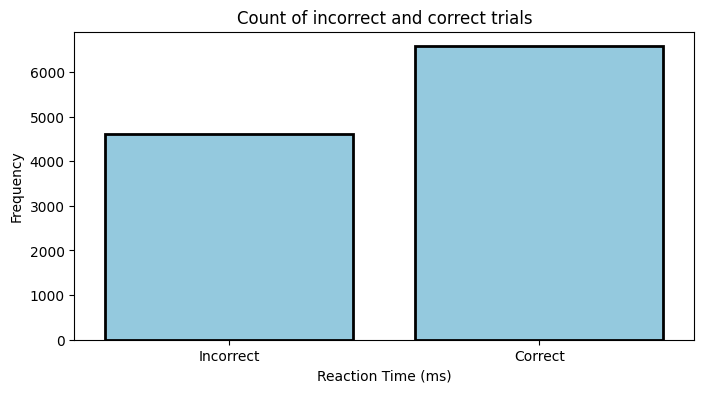

In [13]:
# Snapshot of dependent variables

# RT
plt.figure(figsize=(8,4))
sns.histplot(df_nr['RT'], bins=20, kde=True, color = "skyblue", edgecolor = 'black', linewidth = 2);
plt.xlabel('Reaction Time (ms)');
plt.ylabel('Frequency');
plt.title('Histogram of Reaction Time');
plt.show()
print("-" * 84)
# Data are right-skewed

# Accuracy
plt.figure(figsize=(8,4))
sns.countplot(x=df_nr['Acc'], color = "skyblue", edgecolor = 'black', linewidth = 2);
plt.xlabel('Reaction Time (ms)');
plt.ylabel('Frequency');
plt.title('Count of incorrect and correct trials');
plt.xticks([0,1], ['Incorrect', 'Correct']);
plt.show()

# More correct than incorrect trials

## Training - RT

In [14]:
# Only include blocks 3-10
Training_df = df_nr[(df_nr['Block'] <= 10) & (df_nr['Block'] >= 3)]

In [15]:
# Clean RT data by eliminating trials that are
Training_df_clean_RT = Training_df[(Training_df['Acc'] == 1) & # innacurate,
                                   (Training_df['PrevAcc'] == 1) & # follwed by innacurate trials,
                                   (Training_df['GoodFast'] == 1) & # too slow (>2000 ms) or fast (<300 ms), or
                                   (Training_df['Repeats'] == 0) # repeats of the previous trial.
                                   ];

In [16]:
# Create data sets for rewarded and unrewarded RTs for NCs
NC_training_data_clean_RT = Training_df_clean_RT[Training_df_clean_RT['Group'] == 'NC']

# Mean across subjects for each block
NC_Reward_train_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 1].groupby(['Block'])['RT'].mean().reset_index()
NC_NoReward_train_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 0].groupby(['Block'])['RT'].mean().reset_index()

# Standard deviation for each block
NC_Reward_train_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 1].groupby(['Block'])['RT'].std().reset_index()
NC_NoReward_train_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['RewardType'] == 0].groupby(['Block'])['RT'].std().reset_index()

# Standard error of the mean for each block
NC_R_sem_train_rt = NC_Reward_train_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)
NC_NR_sem_train_rt = NC_NoReward_train_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)

In [17]:
# Create data sets for rewarded and unrewarded RTs for PDs
PD_training_data_clean_RT = Training_df_clean_RT[Training_df_clean_RT['Group'] == 'PD']

# Mean across subjects for each block
PD_Reward_train_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 1].groupby(['Block'])['RT'].mean().reset_index()
PD_NoReward_train_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 0].groupby('Block')['RT'].mean().reset_index()

# Standard deviation for each block
PD_Reward_train_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 1].groupby(['Block',])['RT'].std().reset_index()
PD_NoReward_train_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['RewardType'] == 0].groupby(['Block',])['RT'].std().reset_index()

# Standard error of the mean for each block
PD_R_sem_train_rt = PD_Reward_train_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)
PD_NR_sem_train_rt = PD_NoReward_train_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)

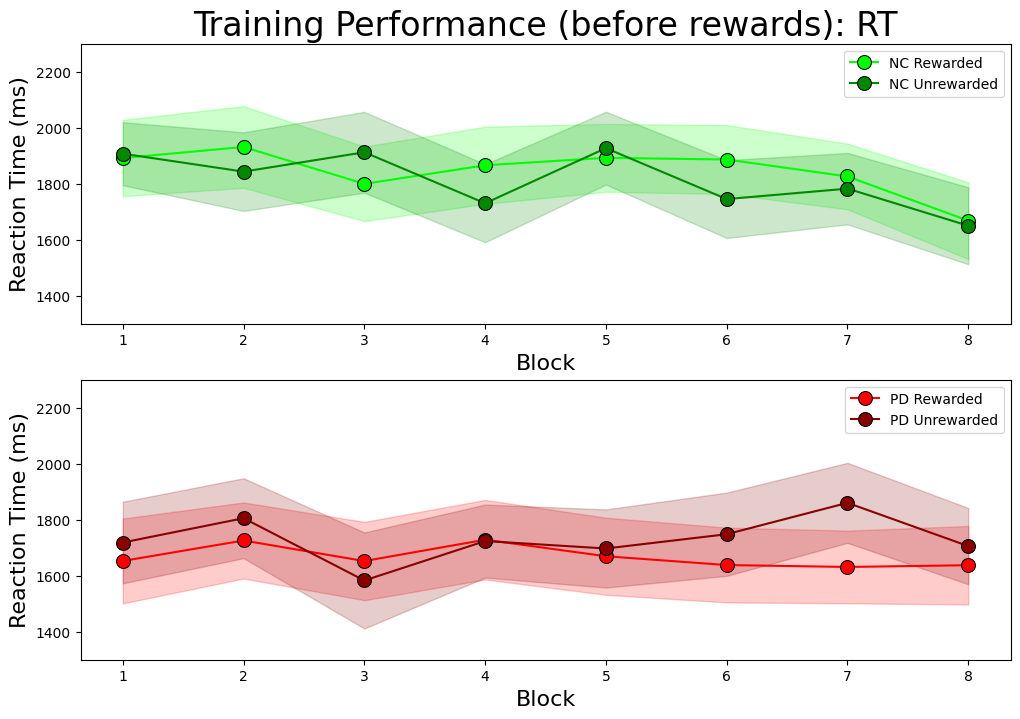

In [18]:
# Training data (RT) Plot. RTs are recorded prior to reward reveal for each trial.

# Create dictionaries for both groups
NC_Training_plot_RT_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                       'Rewarded': NC_Reward_train_m_rt.groupby(['Block'])['RT'].mean().reset_index()['RT'],
                                       'R_sem': NC_R_sem_train_rt['RT'],
                                       'Unrewarded':NC_NoReward_train_m_rt.groupby(['Block'])['RT'].mean().reset_index()['RT'],
                                       'NR_sem':  NC_NR_sem_train_rt['RT']}
                                      );

PD_Training_plot_RT_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                       'Rewarded': PD_Reward_train_m_rt.groupby(['Block'])['RT'].mean().reset_index()['RT'],
                                       'R_sem': PD_R_sem_train_rt['RT'],
                                       'Unrewarded':PD_NoReward_train_m_rt.groupby(['Block'])['RT'].mean().reset_index()['RT'],
                                       'NR_sem': PD_NR_sem_train_rt['RT'],}
                                      );

# Plot
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
# NC Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data = NC_Training_plot_RT_df,
             label='NC Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_RT_df,
             label='NC Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Training_plot_RT_df['Rewarded'] - NC_Training_plot_RT_df['R_sem'],
                 NC_Training_plot_RT_df['Rewarded'] + NC_Training_plot_RT_df['R_sem'], color='#00FF00',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), NC_Training_plot_RT_df['Unrewarded'] - NC_Training_plot_RT_df['NR_sem'],
                 NC_Training_plot_RT_df['Unrewarded'] + NC_Training_plot_RT_df['NR_sem'], color='#008800',
                 alpha=0.2
                 );

plt.xlabel('Block', fontsize = 16);
plt.ylabel('Reaction Time (ms)', fontsize = 16);
plt.title('Training Performance (before rewards): RT', fontsize = 24);
plt.ylim(1300, 2300);

plt.subplot(2,1,2)
# PD Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_RT_df,
             label='PD Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_RT_df,
             label='PD Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PD
plt.fill_between(np.arange(1,9,1), PD_Training_plot_RT_df['Rewarded'] - PD_Training_plot_RT_df['R_sem'],
                 PD_Training_plot_RT_df['Rewarded'] + PD_Training_plot_RT_df['R_sem'], color='#FF0000',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), PD_Training_plot_RT_df['Unrewarded'] - PD_Training_plot_RT_df['NR_sem'],
                 PD_Training_plot_RT_df['Unrewarded'] + PD_Training_plot_RT_df['NR_sem'], color='#880000',
                 alpha=0.2
                 );

# Details
plt.xlabel('Block', fontsize = 16);
plt.ylabel('Reaction Time (ms)', fontsize = 16);
plt.ylim(1300, 2300);
plt.show()

### Result: No strong difference in performance between rewarded and unrewarded pairs during training for both groups.

## Training - Accuracy

In [19]:
# Clean accuracy data by eliminating trials that are
Training_df_clean_Acc = Training_df[(Training_df['PrevAcc'] == 1) & # followed by inaccurate trials
                                    (Training_df['GoodFast'] == 1) & # too slow (> 2000 ms) or too fast (< 300 ms)
                                    (Training_df['Repeats'] == 0) # repeats of the previous trial
                                    ];

In [20]:
# Create data sets for rewarded and unrewarded Accuracy for NCs
NC_training_data_clean_Acc = Training_df_clean_Acc[Training_df_clean_Acc['Group'] == 'NC']

# Mean across subjects for each block
NC_Reward_train_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].mean()
NC_NoReward_train_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].mean()

# Standard Deviation for all blocks
NC_Reward_train_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].std()
NC_NoReward_train_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean for all blocks
NC_R_sem_train_acc = NC_Reward_train_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)
NC_NR_sem_train_acc = NC_NoReward_train_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)

In [21]:
# Create data sets for rewarded and unrewarded Accuracy for PDs
PD_training_data_clean_Acc = Training_df_clean_Acc[Training_df_clean_Acc['Group'] == 'PD']

# Mean across subjects for each block
PD_Reward_train_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].mean()
PD_NoReward_train_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].mean()

# Standard deviation for all blocks
PD_Reward_train_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].std()
PD_NoReward_train_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean for all blocks
PD_R_sem_train_acc = PD_Reward_train_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)
PD_NR_sem_train_acc = PD_NoReward_train_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)

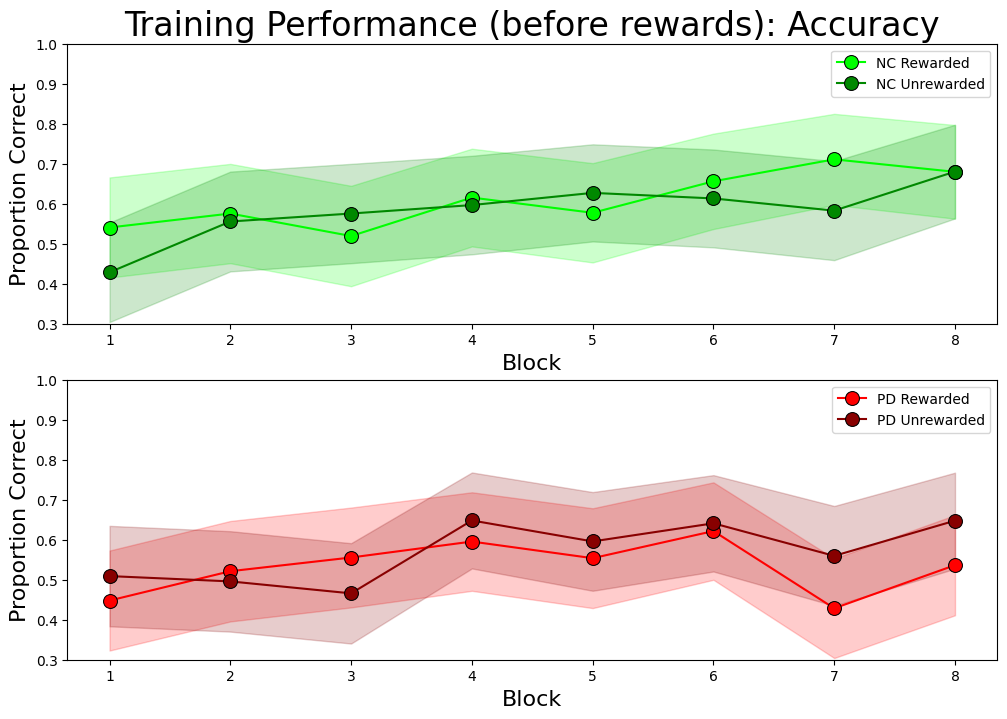

In [22]:
# Training data (Acc) Plot. Accuracy is recorded prior to reward reveal for each trial.

# Create dictionaries for both groups
NC_Training_plot_Acc_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                        'Rewarded': NC_Reward_train_m_acc,
                                        'Unrewarded': NC_NoReward_train_m_acc}
                                       )

PD_Training_plot_Acc_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                        'Rewarded': PD_Reward_train_m_acc,
                                        'Unrewarded': PD_NoReward_train_m_acc}
                                        )

# Plot
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
# NC Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data=NC_Training_plot_Acc_df,
             label='NC Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_Acc_df,
             label='NC Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Reward_train_m_acc - NC_R_sem_train_acc,
                 NC_Reward_train_m_acc + NC_R_sem_train_acc, color='#00FF00',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), NC_NoReward_train_m_acc - NC_NR_sem_train_acc,
                 NC_NoReward_train_m_acc + NC_NR_sem_train_acc, color='#008800',
                 alpha=0.2
                 );
plt.xlabel('Block', fontsize = 16);
plt.ylabel('Proportion Correct', fontsize = 16);
plt.title('Training Performance (before rewards): Accuracy', fontsize = 24)
plt.ylim(0.3, 1);

plt.subplot(2,1,2)
# PD Rewarded training performance
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_Acc_df,
             label='PD Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD Unrewarded training performance
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_Acc_df,
             label='PD Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PD
plt.fill_between(np.arange(1,9,1), PD_Reward_train_m_acc - PD_R_sem_train_acc,
                 PD_Reward_train_m_acc + PD_R_sem_train_acc, color='#FF0000',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), PD_NoReward_train_m_acc - PD_NR_sem_train_acc,
                 PD_NoReward_train_m_acc + PD_NR_sem_train_acc, color='#880000',
                 alpha=0.2
                 );

# Details
plt.xlabel('Block', fontsize = 16);
plt.ylabel('Proportion Correct', fontsize = 16);
plt.ylim(0.3, 1);
plt.show()

### Result: No strong difference in performance between rewarded and unrewarded pairs during training for both groups.

### After Rewarded RT

In [23]:
# Create data sets for RTs after a reward or no reward for NCs

# Means across participants for all blocks
NC_Reward_after_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].mean()
NC_NoReward_after_m_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].mean()

# Standard deviation for all blocks
NC_Reward_after_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].std()
NC_NoReward_after_s_rt = NC_training_data_clean_RT[NC_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].std()

# Standard error of the mean for all blocks
NC_R_sem_after_rt = NC_Reward_after_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)
NC_NR_sem_after_rt = NC_NoReward_after_s_rt / np.sqrt(NC_training_data_clean_RT['Subject'].unique().size)

In [24]:
# Create data sets for RTs after a reward or no reward for PDs

# Means across participants for all blocks
PD_Reward_after_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].mean()
PD_NoReward_after_m_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].mean()

# Standard Deviation for all blocks
PD_Reward_after_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].std()
PD_NoReward_after_s_rt = PD_training_data_clean_RT[PD_training_data_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].std()

# Standard error of the mean for all blocks
PD_R_sem_after_rt = PD_Reward_after_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)
PD_NR_sem_after_rt = PD_NoReward_after_s_rt / np.sqrt(PD_training_data_clean_RT['Subject'].unique().size)

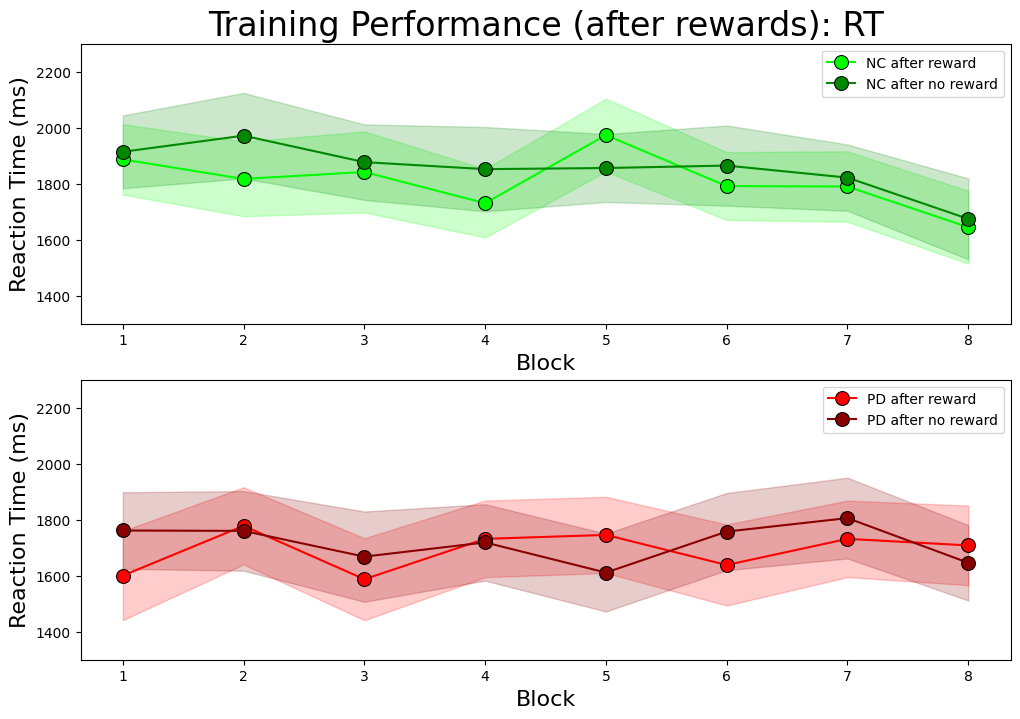

In [25]:
# After reward data (RT) Plot. RTs are recorded on the trial after reward reveal on previous trial.

# Create dictionaries for both groups
NC_Training_plot_afterRT_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                            'Rewarded': NC_Reward_after_m_rt,
                                            'Unrewarded': NC_NoReward_after_m_rt}
                                           )

PD_Training_plot_afterRT_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                            'Rewarded': PD_Reward_after_m_rt,
                                            'Unrewarded': PD_NoReward_after_m_rt}
                                           )

# Plot
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
# NC training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=NC_Training_plot_afterRT_df,
             label='NC after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_afterRT_df,
             label='NC after no reward',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Reward_after_m_rt - NC_R_sem_after_rt,
                 NC_Reward_after_m_rt + NC_R_sem_after_rt, color='#00FF00',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), NC_NoReward_after_m_rt - NC_NR_sem_after_rt,
                 NC_NoReward_after_m_rt + NC_NR_sem_after_rt, color='#008800',
                 alpha=0.2
                 );


plt.xlabel('Block', fontsize = 16);
plt.ylabel('Reaction Time (ms)', fontsize = 16);
plt.title('Training Performance (after rewards): RT', fontsize = 24);
plt.ylim(1300, 2300);

plt.subplot(2,1,2)
# PD training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_afterRT_df,
             label='PD after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_afterRT_df,
             label='PD after no reward',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PDs
plt.fill_between(np.arange(1,9,1), PD_Reward_after_m_rt - PD_R_sem_after_rt,
                 PD_Reward_after_m_rt + PD_R_sem_after_rt, color='#FF0000',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), PD_NoReward_after_m_rt - PD_NR_sem_after_rt,
                 PD_NoReward_after_m_rt + PD_NR_sem_after_rt, color='#880000',
                 alpha=0.2
                 );

# Details
plt.xlabel('Block', fontsize = 16);
plt.ylabel('Reaction Time (ms)', fontsize = 16);
plt.ylim(1300, 2300);
plt.show()

### Result: Response times for trials following rewards (money) did not differ from trials following correct feedback ("correct"). RTs for these trials did not differ between blocks or groups.

### After Reward Acc

In [26]:
# Create data sets for Accuracy after a reward or no reward for NCs

# Mean across participants for all blocks
NC_Reward_after_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].mean()
NC_NoReward_after_m_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].mean()

# Standard Deviation for all blocks
NC_Reward_after_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].std()
NC_NoReward_after_s_acc = NC_training_data_clean_Acc[NC_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean for all blocks
NC_R_sem_after_acc = NC_Reward_after_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)
NC_NR_sem_after_acc = NC_NoReward_after_s_acc / np.sqrt(NC_training_data_clean_Acc['Subject'].unique().size)

In [27]:
# Create data sets for Accuracy after a reward or no reward for PDs

# Mean across participants for all blocks
PD_Reward_after_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].mean()
PD_NoReward_after_m_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].mean()

# Standard Deviation for all blocks
PD_Reward_after_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].std()
PD_NoReward_after_s_acc = PD_training_data_clean_Acc[PD_training_data_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].std()

# Standard error of the mean for all blocks
PD_R_sem_after_acc = PD_Reward_after_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)
PD_NR_sem_after_acc = PD_NoReward_after_s_acc / np.sqrt(PD_training_data_clean_Acc['Subject'].unique().size)

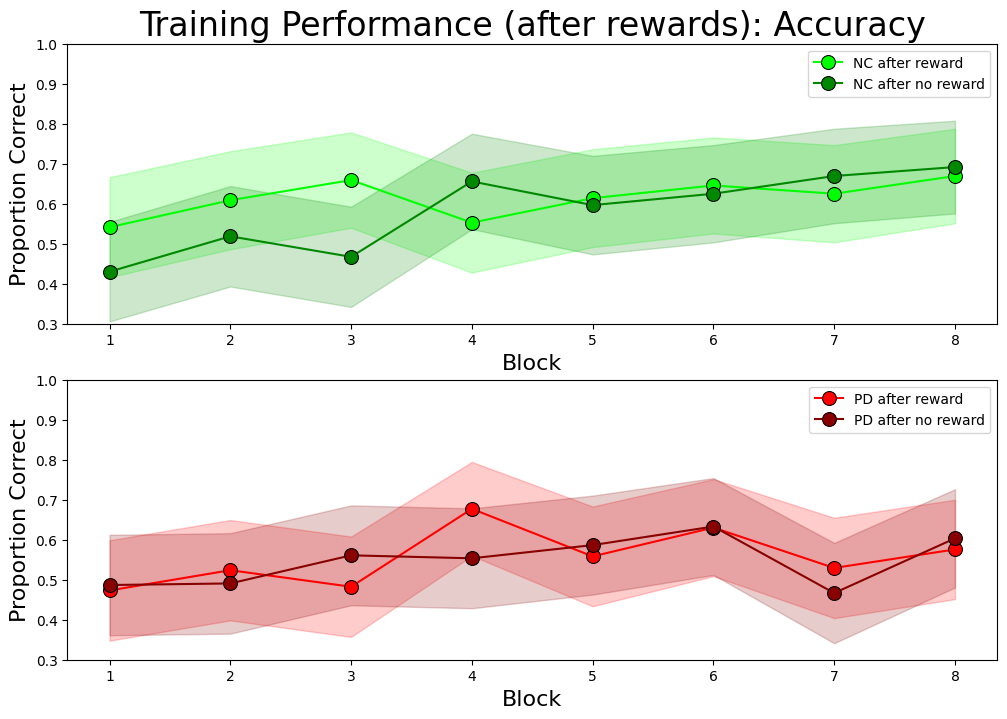

In [28]:
# After reward data (Acc) Plot. Accuracies are recorded on the trial after reward reveal on previous trial.

# Create dictionaries for both groups
NC_Training_plot_afterAcc_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                             'Rewarded': NC_Reward_after_m_acc,
                                             'Unrewarded': NC_NoReward_after_m_acc}
                                            )

PD_Training_plot_afterAcc_df = pd.DataFrame({'Block': np.arange(1,9,1),
                                             'Rewarded': PD_Reward_after_m_acc,
                                             'Unrewarded': PD_NoReward_after_m_acc}
                                            )

# Plot
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
# NC training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=NC_Training_plot_afterAcc_df,
             label='NC after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#00FF00',
             color='#00FF00',
             linestyle='-',
             markeredgecolor = 'black'
);

# NC training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=NC_Training_plot_afterAcc_df,
             label='NC after no reward',
             marker='o',
             markersize=10,
             markerfacecolor='#008800',
             color='#008800',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for NCs
plt.fill_between(np.arange(1,9,1), NC_Reward_after_m_acc - NC_R_sem_after_acc,
                 NC_Reward_after_m_acc + NC_R_sem_after_acc, color='#00FF00',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), NC_NoReward_after_m_acc - NC_NR_sem_after_acc,
                 NC_NoReward_after_m_acc + NC_NR_sem_after_acc, color='#008800',
                 alpha=0.2
                 );

plt.xlabel('Block', fontsize = 16);
plt.ylabel('Proportion Correct', fontsize = 16);
plt.title('Training Performance (after rewards): Accuracy', fontsize = 24)
plt.ylim(0.3, 1);

plt.subplot(2,1,2)
# PD training performance after receiving a reward
sns.lineplot(x='Block',
             y='Rewarded',
             data=PD_Training_plot_afterAcc_df,
             label='PD after reward',
             marker='o',
             markersize=10,
             markerfacecolor='#FF0000',
             color='#FF0000',
             linestyle='-',
             markeredgecolor = 'black'
);

# PD training performance after receiving no reward
sns.lineplot(x='Block',
             y='Unrewarded',
             data=PD_Training_plot_afterAcc_df,
             label='PD after no reward',
             marker='o',
             markersize=10,
             markerfacecolor='#880000',
             color='#880000',
             linestyle='-',
             markeredgecolor = 'black'
);

# Shaded error bars for PDs
plt.fill_between(np.arange(1,9,1), PD_Reward_after_m_acc - PD_R_sem_after_acc,
                 PD_Reward_after_m_acc + PD_R_sem_after_acc, color='#FF0000',
                 alpha=0.2
                 );

plt.fill_between(np.arange(1,9,1), PD_NoReward_after_m_acc - PD_NR_sem_after_acc,
                 PD_NoReward_after_m_acc + PD_NR_sem_after_acc, color='#880000',
                 alpha=0.2
                 );

# Details
plt.xlabel('Block', fontsize = 16);
plt.ylabel('Proportion Correct', fontsize = 16);
plt.ylim(0.3, 1);
plt.show()

### Result: Accuracy for trials following rewards (money) did not differ from trials following correct feedback ("correct"). Accuracy for these trials did not differ between groups.

## Transfer RT (no feedback or rewards)

In [29]:
# Only include block 11 and clean data
Transfer_df = df_nr[(df_nr['Block'] == 11)]

# Eliminate trials that are...
Transfer_df_clean_RT =Transfer_df[(Transfer_df['GoodFast'] == 1) & # Too slow (> 2000 ms) or too fast (< 300 ms), or
                                  (Transfer_df['Acc'] == 1)]; # Innacurate.

# Glance at data
Transfer_df_clean_RT.head()

,Subject,Group,Sex,rmapping,CB,RT,Acc,Block,Trial,F1,...,Repeats,Useable,Qpair,Qconf,QRecall,QRespQ,Composite Awareness,Drop,WM,Med_Split
293,111,NC,2,8,15,1780.0,1.0,11,2,Face2.jpg,...,0,0,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
295,111,NC,2,8,15,1002.0,1.0,11,4,Face1.jpg,...,0,0,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
296,111,NC,2,8,15,1573.0,1.0,11,5,Face2.jpg,...,0,1,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
297,111,NC,2,8,15,1488.0,1.0,11,6,Face1.jpg,...,0,1,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0
298,111,NC,2,8,15,1218.0,1.0,11,7,Face3.jpg,...,0,1,NaN,NaN,NaN,NaN,0.847222,0.0,8,1.0


In [30]:
# Create data frame with the average RT for each group, pair type (rewarded vs. unrewarded), and participant.
RT_by_group = Transfer_df_clean_RT.groupby(['Group','RewardType','Subject'])['RT'].mean()
RT_by_group = RT_by_group.reset_index()

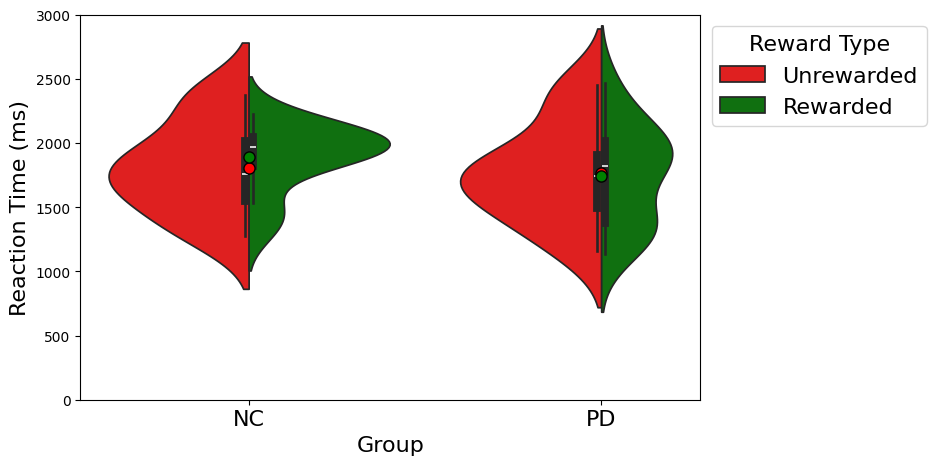

In [31]:
# Plot transfer RT data for each group (NC and PD) and Reward type (rewarded vs. unrewarded)
plt.figure(figsize=(8,5))
plot_data = RT_by_group.groupby(['Group','RewardType','Subject'])['RT'].mean().reset_index()
ax = sns.violinplot(x='Group', y='RT', hue = 'RewardType',data=plot_data, palette=['red','green'],split = True, );

# Add means to plot
Mns = Transfer_df_clean_RT.groupby(['Group','RewardType','Subject'])['RT'].mean()
Mns_avg = Mns.groupby(level=[0,1]).mean()

for g in ['NC','PD']:
    for i, mean in enumerate(Mns_avg[g]):
      if i == 0:
        ax.plot(g, mean, marker='o', color='red', markersize=8, markeredgecolor = 'black')
      else:
        ax.plot(g, mean, marker='o', color='green', markersize=8, markeredgecolor = 'black')

# Get the handles and labels
handles, labels = ax.get_legend_handles_labels()

# Modify the labels
new_labels = ['Unrewarded', 'Rewarded']

# Remove the old legend
ax.legend_.remove()

# Create new legend with modified labels
ax.legend(handles, new_labels, title='Reward Type', fontsize = 16)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16)

# Details
ax.set_xticks([0, 1]);
ax.set_xlabel('Group', fontsize = 16);
plt.setp(ax.get_legend().get_title(), fontsize='16')
ax.set_xticklabels(["NC", "PD"],fontsize = 16)
ax.set_ylabel('Reaction Time (ms)',fontsize = 16);
plt.ylim(0,3000);
plt.show()

In [32]:
#### Assumption 1: Normality of reaction time data

w_shapiro_transfer_rt, p_value_shapiro_transfer_rt = stats.shapiro(RT_by_group['RT'])
print('Because the p-value is ', p_value_shapiro_transfer_rt, " ...", sep = '')

if p_value_shapiro_transfer_rt < 0.05:
  print("We reject the null hypothesis that RT data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that RT data are normally distributed.')

Because the p-value is 0.16757065675267052 ...
We fail the reject the null hypothesis that RT data are normally distributed.


In [33]:
#### Assumption 2: Homogeneity of Variance for RT between rewarded and unrewarded pairs

statistic_levenes_transfer_rt, p_value_levenes_transfer_RT = levene( RT_by_group['RT'][RT_by_group['RewardType']==0],
                                                                     RT_by_group['RT'][RT_by_group['RewardType']==1]);
print('Because the p-value is ', round(p_value_levenes_transfer_RT,4),"...", sep = '')

if p_value_levenes_transfer_RT < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.6018...
We fail to reject the null hypothesis that the population variances are equal between reward types.


In [34]:
# Significance testing using two-way ANOVA

formula = 'RT ~ C(RewardType) + C(Group) + C(RewardType):C(Group)'
model = ols(formula, data=RT_by_group).fit()

# calculate the p-value using a two-way ANOVA test
anova_table = sm.stats.anova_lm(model, typ=3)

print(' ------------- Results for transfer RT data -------------')
print("The reward F-statistic is ", round(anova_table['F'].iloc[0],3), " and the p-value is ", anova_table['PR(>F)'].iloc[0],".",sep="")
print("The group F-statistic is ", round(anova_table['F'].iloc[1],3), " and the p-value is ", round(anova_table['PR(>F)'].iloc[1],4),".",sep="")
print("The interaction F-statistic is ", round(anova_table['F'].iloc[2],3), " and the p-value is ", round(anova_table['PR(>F)'].iloc[2],4),".",sep="")

 ------------- Results for transfer RT data -------------
The reward F-statistic is 423.64 and the p-value is 7.042252793083e-29.
The group F-statistic is 0.478 and the p-value is 0.492.
The interaction F-statistic is 0.11 and the p-value is 0.7416.


### Result: Rewarded pairs were performed significantly slower than unrewarded pairs. No difference in the effect of reward on RTs between groups was identified.

## Transfer Acc

In [35]:
# Eliminate trials from Block 11 that are...
Transfer_df_clean_Acc = Transfer_df[(Transfer_df['GoodFast'] == 1)]; # Too slow (>2000 ms) or too fast (<300 ms)

In [36]:
# Create data frame with the average accuracy for each group, pair type (rewarded vs. unrewarded), and participant.
Acc_by_group = Transfer_df_clean_Acc.groupby(['Group','RewardType','Subject'])['Acc'].mean()
Acc_by_group = Acc_by_group.reset_index()

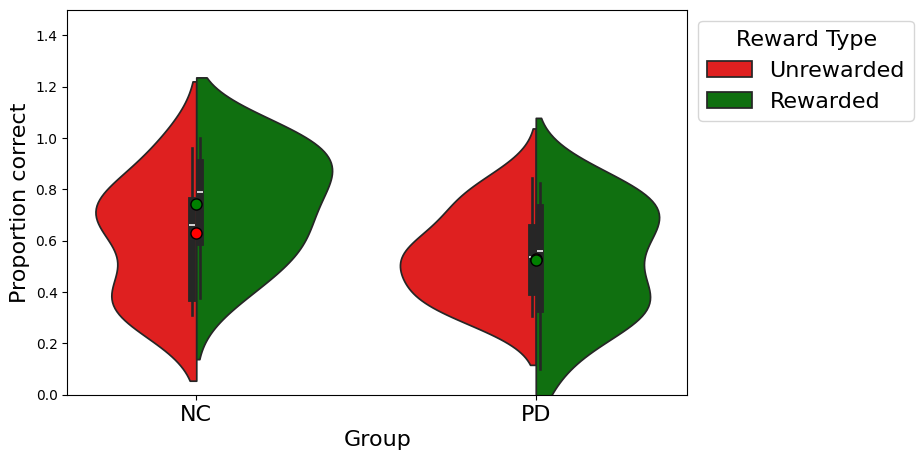

In [37]:
# Plot transfer accuracy data for each group (NC and PD) and Reward type (rewarded vs. unrewarded)
plt.figure(figsize=(8,5))
plot_data = Acc_by_group.groupby(['Group','RewardType','Subject'])['Acc'].mean().reset_index()
ax = sns.violinplot(x='Group', y='Acc', hue = 'RewardType',data=plot_data, palette=['red','green'],split = True);

# Add means to plot
Mns = Transfer_df_clean_Acc.groupby(['Group','RewardType'])['Acc'].mean()
Mns_avg = Mns.groupby(level=[0,1]).mean()

for g in ['NC','PD']:
    for i, mean in enumerate(Mns_avg[g]):
      if i == 0:
        ax.plot(g, mean, marker='o', color='red', markersize=8, markeredgecolor = 'black')
      else:
        ax.plot(g, mean, marker='o', color='green', markersize=8, markeredgecolor = 'black')

# Get the handles and labels
handles, labels = ax.get_legend_handles_labels()

# Modify the labels
new_labels = ['Unrewarded', 'Rewarded']

# Remove the old legend
ax.legend_.remove()

# Create new legend with modified labels
ax.legend(handles, new_labels, title='Reward Type', fontsize = 16)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16)

# Details
ax.set_xticks([0, 1]);
ax.set_xlabel('Group', fontsize = 16);
plt.setp(ax.get_legend().get_title(), fontsize='16')
ax.set_xticklabels(["NC", "PD"],fontsize = 16)
ax.set_ylabel('Proportion correct',fontsize = 16);
plt.ylim(0,1.5);
plt.show()

In [38]:
#### Assumption 1: Normality of accuracy data

#### find the p-value of Levene's test
w_shapiro_transfer_acc, p_value_shapiro_transfer_acc = stats.shapiro(Acc_by_group['Acc'])
print('Because the p-value is ', round(p_value_shapiro_transfer_acc,5),"...", sep = '')

if p_value_shapiro_transfer_acc < 0.05:
  print("We reject the null hypothesis that accuracy data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that accuracy data are normally distributed.')

Because the p-value is 0.0498...
We reject the null hypothesis that accuracy data are normally distributed.


In [39]:
#### Assumption 2: Homogeneity of Variance
statistic_levenes_transfer_acc, p_value_levenes_transfer_acc = levene(Acc_by_group['Acc'][Acc_by_group['RewardType']==0],
                                                                      Acc_by_group['Acc'][Acc_by_group['RewardType']==1]);
#### find the p-value of Levene's test
print('Because the p-value is ', round(p_value_levenes_transfer_acc,7),"...", sep = '')

if p_value_levenes_transfer_acc < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.3238445...
We fail to reject the null hypothesis that the population variances are equal between reward types.


In [40]:
# Significance testing using two-way ANOVA
formula = 'Acc ~ C(RewardType) + C(Group) + C(RewardType):C(Group)'
model = ols(formula, data=Transfer_df_clean_Acc).fit()

# calculate the p-value using a two-way ANOVA test
anova_table = sm.stats.anova_lm(model, typ=3)
#print(anova_table)

print(' ------------- Results for transfer Acc data -------------')
print("The reward F-statistic is ", round(anova_table['F'].iloc[0],3), " and the p-value is ", anova_table['PR(>F)'].iloc[0],4,".",sep="")
print("The group F-statistic is ", round(anova_table['F'].iloc[1],3), " and the p-value is ", round(anova_table['PR(>F)'].iloc[1],4),".",sep="")
print("The interaction F-statistic is ", round(anova_table['F'].iloc[2],3), " and the p-value is ", anova_table['PR(>F)'].iloc[2],".",sep="")

 ------------- Results for transfer Acc data -------------
The reward F-statistic is 561.55 and the p-value is 1.536600954607609e-1034.
The group F-statistic is 8.508 and the p-value is 0.0036.
The interaction F-statistic is 7.447 and the p-value is 0.006440762697453626.


### Result: Rewarded pairs were performed more accurately than pairs pairs. NCs were significantly more accurate than PDs. Patients with PD experienced a significantly reduced reward effect compared to NCs. Patients with PD experience a diminshed effect of reward on accuracy.

## Median Split Analysis

### The median split analysis was performed to determine whether patients with PD experienced no effect of reward because 1) they did not learn the task, or 2) they are insensitive to reward. We expected participants with PD with higher overall accuracy (PD_High = 0.71 accuracy) to show no strong evidence of a reward effect.

In [41]:
# Split data into four groups: (NC_High, NC_Low, PD_High, PD_Low)
Acc_by_group = Transfer_df_clean_Acc.groupby(['Group','RewardType','Subject', 'Med_Split'])['Acc'].mean()
Acc_by_group = Acc_by_group.reset_index()

# NCs with higher overall accuracy
NC_High = Acc_by_group[(Acc_by_group['Group'] == 'NC') & (Acc_by_group['Med_Split']==1)]
NC_High_rew = NC_High[NC_High['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
NC_High_unr = NC_High[NC_High['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

# NCs with higher overall accuracy
NC_Low = Acc_by_group[(Acc_by_group['Group'] == 'NC') & (Acc_by_group['Med_Split']==-1)]
NC_Low_rew = NC_Low[NC_Low['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
NC_Low_unr = NC_Low[NC_Low['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

# NCs with higher overall accuracy
PD_High = Acc_by_group[(Acc_by_group['Group'] == 'PD') & (Acc_by_group['Med_Split']==1)]
PD_High_rew = PD_High[PD_High['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
PD_High_unr = PD_High[PD_High['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

# NCs with higher overall accuracy
PD_Low = Acc_by_group[(Acc_by_group['Group'] == 'PD') & (Acc_by_group['Med_Split']==-1)]
PD_Low_rew = PD_Low[PD_Low['RewardType'] == 1].groupby(['Subject'])['Acc'].mean();
PD_Low_unr = PD_Low[PD_Low['RewardType'] == 0].groupby(['Subject'])['Acc'].mean();

In [42]:
# Significance testing using paired t-tests

# Reward effect for NC with higher overall acc
NC_High_t_stat, NC_High_p_value = stats.ttest_ind(NC_High_rew, NC_High_unr, equal_var=True)
print(' ------------- Results for NC (higher overall accuracy) -------------')
print("Overall accuracy for NC High: ", round(NC_High['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(NC_High_t_stat,3), " and the p-value is ", round(NC_High_p_value,3),".",sep="")
print(' ')

# Reward effect for NC with lower overall acc
NC_Low_t_stat, NC_Low_p_value = stats.ttest_ind(NC_Low_rew, NC_Low_unr, equal_var=True)
print(' ------------- Results for NC (lower overall accuracy) -------------')
print("Overall accuracy for NC Low: ", round(NC_Low['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(NC_Low_t_stat,3), " and the p-value is ", round(NC_Low_p_value,3),".",sep="")
print(' ')

# Reward effect for PD with higher overall acc
PD_High_t_stat, PD_High_p_value = stats.ttest_ind(PD_High_rew, PD_High_unr, equal_var=True)
print(' ------------- Results for PD (higher overall accuracy) -------------')
print("Overall accuracy for PD High: ", round(PD_High['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(PD_High_t_stat,3), " and the p-value is ", round(PD_High_p_value,3),".",sep="")
print(' ')

# Reward effect for PD with lower overall acc
PD_Low_t_stat, PD_Low_p_value = stats.ttest_ind(PD_Low_rew, PD_Low_unr, equal_var=True)
print(' ------------- Results for PD (lower overall accuracy)-------------')
print("Overall accuracy for PD Low: ", round(PD_Low['Acc'].mean(),3),".",sep="")
print("The t-statistic is ", round(PD_Low_t_stat,3), " and the p-value is ", round(PD_Low_p_value,3),".",sep="")


 ------------- Results for NC (higher overall accuracy) -------------
Overall accuracy for NC High: 0.816.
The t-statistic is 0.808 and the p-value is 0.433.
 
 ------------- Results for NC (lower overall accuracy) -------------
Overall accuracy for NC Low: 0.539.
The t-statistic is 2.753 and the p-value is 0.016.
 
 ------------- Results for PD (higher overall accuracy) -------------
Overall accuracy for PD High: 0.655.
The t-statistic is -0.237 and the p-value is 0.817.
 
 ------------- Results for PD (lower overall accuracy)-------------
Overall accuracy for PD Low: 0.437.
The t-statistic is -0.131 and the p-value is 0.898.


### Results: Even when isolating patients with Parkinson's diseas with higher overall accuracy, they show no effect of reward on learning. Thus, overall accuracy on the task did not determine the effect of reward on learning for patients with PD.

## Questionnaire

### Reaction Time Data

In [43]:
# Organize RT reward effects (NC): Transfer RTs on unrewarded trials minus RTs on rewarded trials (positive values = greater reward effect)
NC_Transfer_df_clean_RT = Transfer_df_clean_RT[Transfer_df_clean_RT['Group'] == 'NC']
NC_All_Rs = NC_Transfer_df_clean_RT[NC_Transfer_df_clean_RT['RewardType']==1].groupby(NC_Transfer_df_clean_RT['Subject'])['RT'].mean()
NC_All_Us = NC_Transfer_df_clean_RT[NC_Transfer_df_clean_RT['RewardType']==0].groupby(NC_Transfer_df_clean_RT['Subject'])['RT'].mean()
NC_REffect_RT = NC_All_Rs - NC_All_Us

# Organize RT reward effects (PD): Transfer RTs on unrewarded trials minus RTs on rewarded trials (positive values = greater reward effect)
PD_Transfer_df_clean_RT = Transfer_df_clean_RT[Transfer_df_clean_RT['Group'] == 'PD']
PD_All_Rs = PD_Transfer_df_clean_RT[PD_Transfer_df_clean_RT['RewardType']==1].groupby(PD_Transfer_df_clean_RT['Subject'])['RT'].mean()
PD_All_Us = PD_Transfer_df_clean_RT[PD_Transfer_df_clean_RT['RewardType']==0].groupby(PD_Transfer_df_clean_RT['Subject'])['RT'].mean()
PD_REffect_RT = PD_All_Rs - PD_All_Us

In [44]:
# Organize recall (range = 0-1) and composite awareness (range = 0-2) data.
Only_Q = df_nr[df_nr['Block'] == 12]
cAware_data = Only_Q.groupby(['Group','Subject'])['Composite Awareness'].mean()
recall_data = Only_Q.groupby(['Group','Subject'])['QRecall'].mean()
recall_data = recall_data.reset_index()
cAware_data = cAware_data.reset_index()

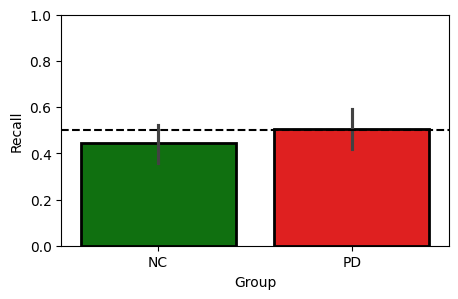

In [45]:
# Plot recall in relation to chance (black dashed line)
plt.figure(figsize=(5,3))
sns.barplot(x = 'Group', y = 'QRecall', data = Only_Q, hue = 'Group',edgecolor = 'black', linewidth = 2, palette = ['green','red'])
plt.ylabel('Recall');
plt.xlabel('Group');
plt.axhline(y = 0.5, color = 'black', linestyle = '--')
plt.ylim(0,1);
plt.show()

In [46]:
# Test if recall performance is different from chance for NCs

# Correlations between reward effects, recall, and composite awareness (NC)
NC_recall = Only_Q[Only_Q['Group'] == 'NC'].groupby('Subject')['QRecall'].mean()
NC_cAware = Only_Q[Only_Q['Group'] == 'NC'].groupby('Subject')['Composite Awareness'].mean()
NC_Q_Data = pd.DataFrame({'Group': 'NC', 'Reward Effect': NC_REffect_RT,
                          'Recall': NC_recall, 'Composite Awareness': NC_cAware}
                         )

print("-" * 100)
sample_successes_nc = NC_Q_Data[NC_Q_Data['Recall'] > 0.5]['Recall'].count()
sample_size_nc = len(NC_Q_Data)
z_stat_nc_recall, p_value_nc_recall = sm.stats.proportions_ztest(
    sample_successes_nc, sample_size_nc, 0.5, alternative='larger'
);
print('NC explicit memory performance is not above chance: p = ', round(p_value_nc_recall,4),"...", sep = '')
print("-" * 100)

# Test if recall is different from chance for PDs
PD_recall = Only_Q[Only_Q['Group'] == 'PD'].groupby('Subject')['QRecall'].mean()
PD_cAware = Only_Q[Only_Q['Group'] == 'PD'].groupby('Subject')['Composite Awareness'].mean()
PD_Q_Data = pd.DataFrame({'Group': 'PD', 'Reward Effect': PD_REffect_RT,
                          'Recall': PD_recall, 'Composite Awareness': PD_cAware}
                         )

print("-" * 100)
sample_successes_pd = PD_Q_Data[PD_Q_Data['Recall'] > 0.5]['Recall'].count()
sample_size_pd = len(PD_Q_Data)
z_stat_pd_recall, p_value_pd_recall = sm.stats.proportions_ztest(
    sample_successes_pd, sample_size_pd, 0.5, alternative='larger'
);
print('PD explicit memory performance is not above chance: p = ', round(p_value_pd_recall,4),"...", sep = '')
print("-" * 100)

# Test whether explicit memory is different between groups
t_statistic_q_rt, p_value_q_rt = stats.ttest_ind(recall_data[recall_data['Group'] == 'NC']['QRecall'], recall_data[recall_data['Group'] == 'PD']['QRecall'])
print('Because the p-value is ', round(p_value_q_rt,4),"...", sep = '')
if p_value_q_rt < 0.05:
  print("We reject the null hypothesis that recall is the same between groups.")
else:
  print('We fail the reject the null hypothesis that recall is the same between groups.')

print("-" * 100)

----------------------------------------------------------------------------------------------------
NC explicit memory performance is not above chance: p = 0.9895...
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PD explicit memory performance is not above chance: p = 0.9895...
----------------------------------------------------------------------------------------------------
Because the p-value is 0.341...
We fail the reject the null hypothesis that recall is the same between groups.
----------------------------------------------------------------------------------------------------


### Result: There is no strong evidence that either group gained explicit awareness of which pairs were rewarded or that awareness differed between groups.

In [47]:
# Correlations between reward effects, recall, and composite awareness (NC)
print(' ---------------------- NC Correlations ---------------------- ')
NC_Q_Data_flt = NC_Q_Data.drop(['Group'], axis=1)
print(NC_Q_Data_flt.corr())
print(' ')

# Correlations between reward effects, recall, and composite awareness (PD)
print(' ---------------------- PD Correlations ----------------------- ')
NC_Q_Data_flt = PD_Q_Data.drop(['Group'], axis=1)
print(NC_Q_Data_flt.corr())

 ---------------------- NC Correlations ---------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000 -0.043988             0.104282
Recall                   -0.043988  1.000000             0.605256
Composite Awareness       0.104282  0.605256             1.000000
 
 ---------------------- PD Correlations ----------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000 -0.144831            -0.163278
Recall                   -0.144831  1.000000             0.511382
Composite Awareness      -0.163278  0.511382             1.000000


In [48]:
# statistical testing on correlations for NCs
print(' ---------------------- NC Correlations ----------------------- ')
pearson_corr_nc_rt_recall, p_value_corr_nc_rt_recall = pearsonr(NC_REffect_RT, NC_recall)
print("NC Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_rt_recall,3), " and the p-value is ", round(p_value_corr_nc_rt_recall,8),".",sep="")
pearson_corr_nc_rt_ca, p_value_corr_nc_rt_ca = pearsonr(NC_REffect_RT, NC_cAware)
print("NC cAware and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_rt_ca,3), " and the p-value is ", round(p_value_corr_nc_rt_ca,8),".",sep="")

print(' ' )
# statistical testing on correlations for PDs
print(' ---------------------- PD Correlations ----------------------- ')
pearson_corr_pd_rt_recall, p_value_corr_pd_rt_recall = pearsonr(PD_REffect_RT, PD_recall)
print("PD Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_rt_recall,3), " and the p-value is ", round(p_value_corr_pd_rt_recall,8),".",sep="")
pearson_corr_pd_rt_ca, p_value_corr_pd_rt_ca = pearsonr(PD_REffect_RT, PD_cAware)
print("PD Composite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_rt_ca,3), " and the p-value is ", round(p_value_corr_pd_rt_ca,8),".",sep="")

# Recall was above chance but not associated with reward learning on RT

 ---------------------- NC Correlations ----------------------- 
NC Recall and reward effect: The Pearson correlation coefficient is -0.044 and the p-value is 0.8714978.
NC cAware and reward effect: The Pearson correlation coefficient is 0.104 and the p-value is 0.7007249.
 
 ---------------------- PD Correlations ----------------------- 
PD Recall and reward effect: The Pearson correlation coefficient is -0.145 and the p-value is 0.59253486.
PD Composite awareness and reward effect: The Pearson correlation coefficient is -0.163 and the p-value is 0.54570319.


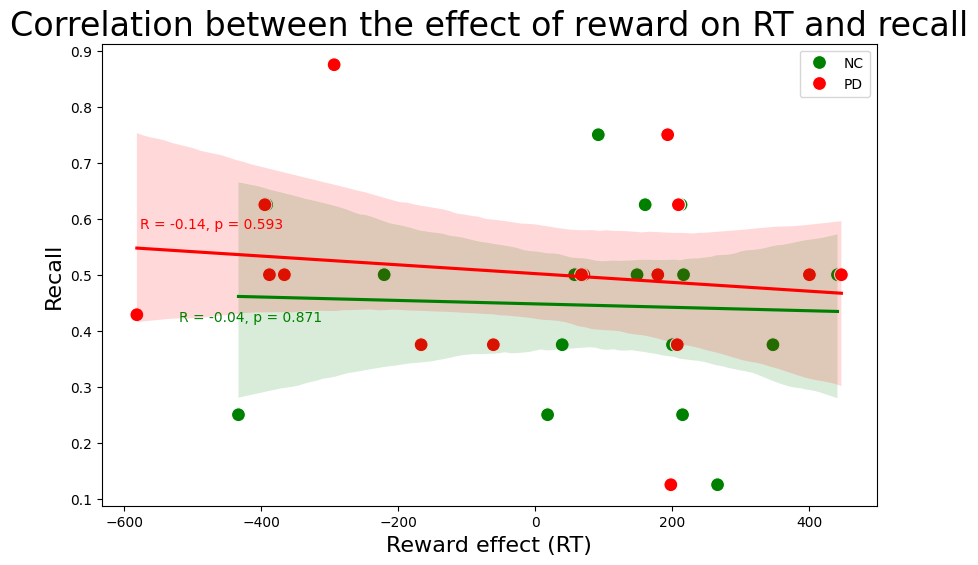

In [49]:
# Scatter plots - RT Reward effect and recall

# Combine dictionaries vertically
Combined_recall = pd.concat([NC_Q_Data, PD_Q_Data], axis=0)

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Recall', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (RT)', fontsize= 16)
plt.ylabel('Recall', fontsize = 16)
plt.title('Correlation between the effect of reward on RT and recall', fontsize = 24)
plt.text(0.05, 0.6, f'R = {pearson_corr_pd_rt_recall:.2f}, p = {p_value_corr_pd_rt_recall:.3f}', transform=plt.gca().transAxes,color = 'r')
plt.text(0.1, 0.4, f'R = {pearson_corr_nc_rt_recall:.2f}, p = {p_value_corr_nc_rt_recall:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

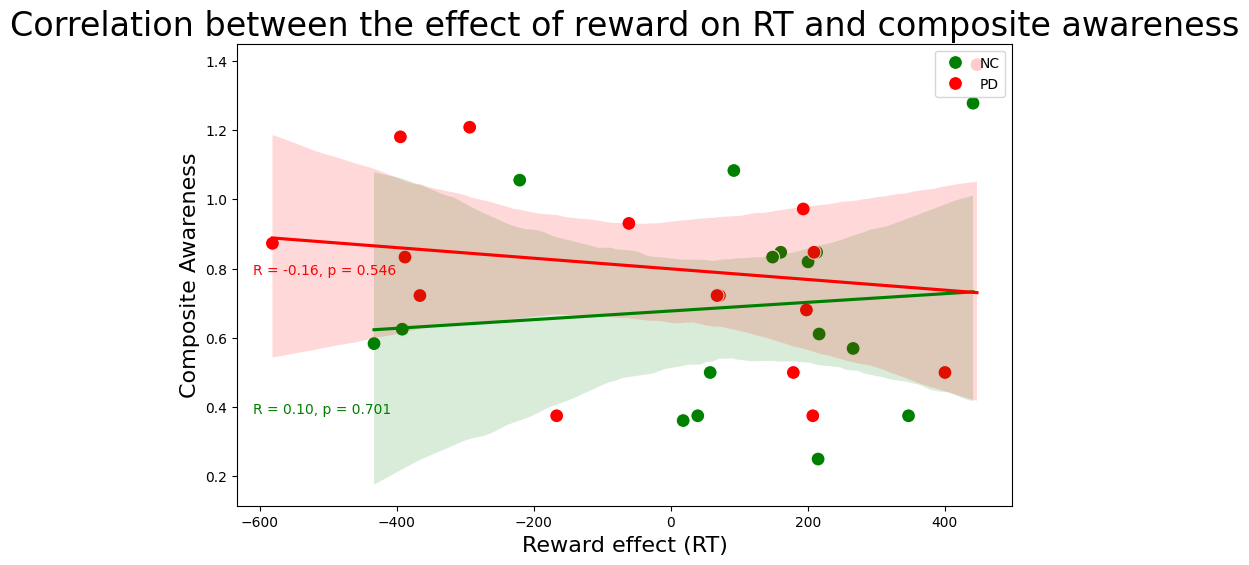

In [50]:
# Scatter plots - RT Reward effect and Composite Awareness

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Composite Awareness', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (RT)', fontsize = 16)
plt.ylabel('Composite Awareness', fontsize = 16)
plt.title('Correlation between the effect of reward on RT and composite awareness', fontsize = 24)
plt.text(0.02, 0.5, f'R = {pearson_corr_pd_rt_ca:.2f}, p = {p_value_corr_pd_rt_ca:.3f}', transform=plt.gca().transAxes, color = 'r')
plt.text(0.02, 0.2, f'R = {pearson_corr_nc_rt_ca:.2f}, p = {p_value_corr_nc_rt_ca:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

### Result: No strong evidence that the effect of reward on RT is associated with explicit sequence knowledge for either group.

### Accuracy data

In [51]:
# Organize reward effects (NC)
NC_Transfer_df_clean_Acc = Transfer_df_clean_Acc[Transfer_df_clean_Acc['Group'] == 'NC']
NC_All_Rs = NC_Transfer_df_clean_Acc[NC_Transfer_df_clean_Acc['RewardType']==1].groupby(NC_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
NC_All_Us = NC_Transfer_df_clean_Acc[NC_Transfer_df_clean_Acc['RewardType']==0].groupby(NC_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
NC_REffect_Acc = NC_All_Rs - NC_All_Us

# Organize reward effects (PD)
PD_Transfer_df_clean_Acc = Transfer_df_clean_Acc[Transfer_df_clean_Acc['Group'] == 'PD']
PD_All_Rs = PD_Transfer_df_clean_Acc[PD_Transfer_df_clean_Acc['RewardType']==1].groupby(PD_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
PD_All_Us = PD_Transfer_df_clean_Acc[PD_Transfer_df_clean_Acc['RewardType']==0].groupby(PD_Transfer_df_clean_Acc['Subject'])['Acc'].mean()
PD_REffect_Acc = PD_All_Rs - PD_All_Us

In [52]:
# Organize recall and composite awareness
Only_Q = df_nr[df_nr['Block'] == 12]
cAware_data = Only_Q.groupby(['Group','Subject'])['Composite Awareness'].mean()
recall_data = Only_Q.groupby(['Group','Subject'])['QRecall'].mean()
recall_data = recall_data.reset_index()
cAware_data = cAware_data.reset_index()

In [53]:
# Correlations between reward effects, recall, and composite awareness (NC)
print(' ---------------------- NC Correlations ----------------------- ')
NC_Q_Data = pd.DataFrame({'Group': 'NC', 'Reward Effect': NC_REffect_Acc,
                          'Recall': NC_recall, 'Composite Awareness': NC_cAware}
                         )

NC_Q_Data_flt = NC_Q_Data.drop(['Group'], axis=1)
print(NC_Q_Data_flt.corr())
print(' ')

# Correlations between reward effects, recall, and composite awareness (PD)
print(' ---------------------- PD Correlations ----------------------- ')
PD_Q_Data = pd.DataFrame({'Group': 'PD', 'Reward Effect': PD_REffect_Acc,
                          'Recall': PD_recall, 'Composite Awareness': PD_cAware}
                         )

PD_Q_Data_flt = PD_Q_Data.drop(['Group'], axis=1)
print(PD_Q_Data_flt.corr())

 ---------------------- NC Correlations ----------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000  0.009639            -0.012253
Recall                    0.009639  1.000000             0.605256
Composite Awareness      -0.012253  0.605256             1.000000
 
 ---------------------- PD Correlations ----------------------- 
                     Reward Effect    Recall  Composite Awareness
Reward Effect             1.000000 -0.677957            -0.500857
Recall                   -0.677957  1.000000             0.511382
Composite Awareness      -0.500857  0.511382             1.000000


In [54]:
# Statistical testing on correlations
print(' ---------------------- NC Correlations ----------------------- ')
pearson_corr_nc_acc_corr_recall, p_value_nc_acc_corr_recall = pearsonr(NC_REffect_Acc, NC_recall)
print("NC Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_acc_corr_recall,3), " and the p-value is ", round(p_value_nc_acc_corr_recall,8),".",sep="")
pearson_corr_nc_acc_corr_ca, p_value_nc_acc_corr_ca = pearsonr(NC_REffect_Acc, NC_cAware)
print("NC Composite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_nc_acc_corr_ca,3), " and the p-value is ", round(p_value_nc_acc_corr_ca,8),".",sep="")

print(' ' )
print(' ---------------------- PD Correlations ----------------------- ')
pearson_corr_pd_acc_corr_recall, p_value_pd_acc_corr_recall = pearsonr(PD_REffect_Acc, PD_recall)
print("PD Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_acc_corr_recall,3), " and the p-value is ", round(p_value_pd_acc_corr_recall,8),".",sep="")
pearson_corr_pd_acc_corr_ca, p_value_pd_acc_corr_ca = pearsonr(PD_REffect_Acc, PD_cAware)
print("PD Composite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr_pd_acc_corr_ca,3), " and the p-value is ", round(p_value_pd_acc_corr_ca,8),".",sep="")

# Recall and composite awareness are negatively associated with the effect of reward on accuracy.

 ---------------------- NC Correlations ----------------------- 
NC Recall and reward effect: The Pearson correlation coefficient is 0.01 and the p-value is 0.97173803.
NC Composite awareness and reward effect: The Pearson correlation coefficient is -0.012 and the p-value is 0.96407845.
 
 ---------------------- PD Correlations ----------------------- 
PD Recall and reward effect: The Pearson correlation coefficient is -0.678 and the p-value is 0.00389852.
PD Composite awareness and reward effect: The Pearson correlation coefficient is -0.501 and the p-value is 0.04813436.


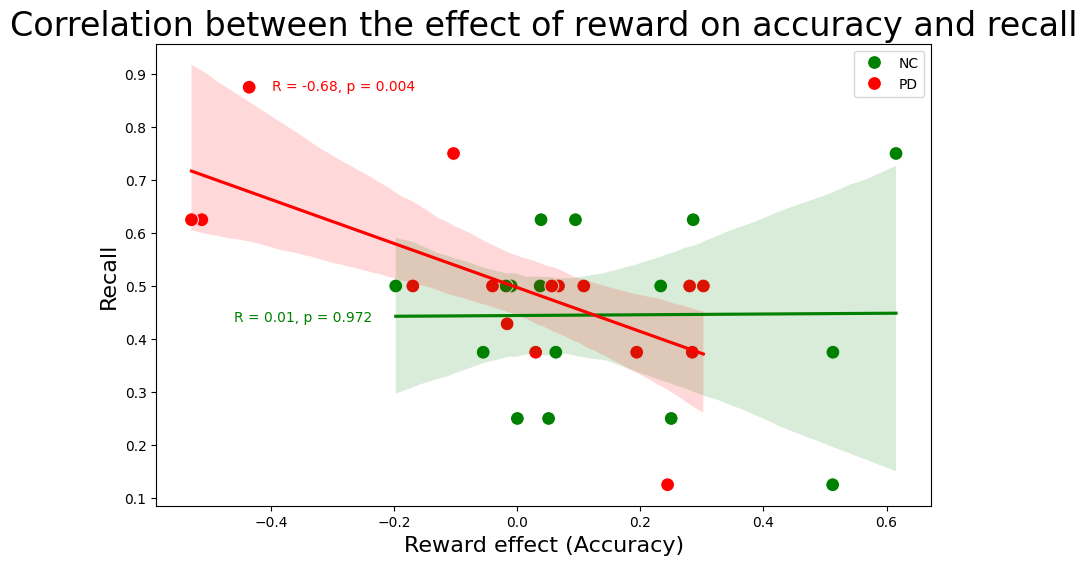

In [55]:
# Scatter plots - Accuracy Reward effect and recall

# Combine dictionaries vertically
Combined_recall = pd.concat([NC_Q_Data, PD_Q_Data], axis=0)

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Recall', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Recall', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (Accuracy)', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.title('Correlation between the effect of reward on accuracy and recall', fontsize = 24)
plt.text(0.15, 0.9, f'R = {pearson_corr_pd_acc_corr_recall:.2f}, p = {p_value_pd_acc_corr_recall:.3f}', transform=plt.gca().transAxes, color = 'r')
plt.text(0.1, 0.4, f'R = {pearson_corr_nc_acc_corr_recall:.2f}, p = {p_value_nc_acc_corr_recall:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

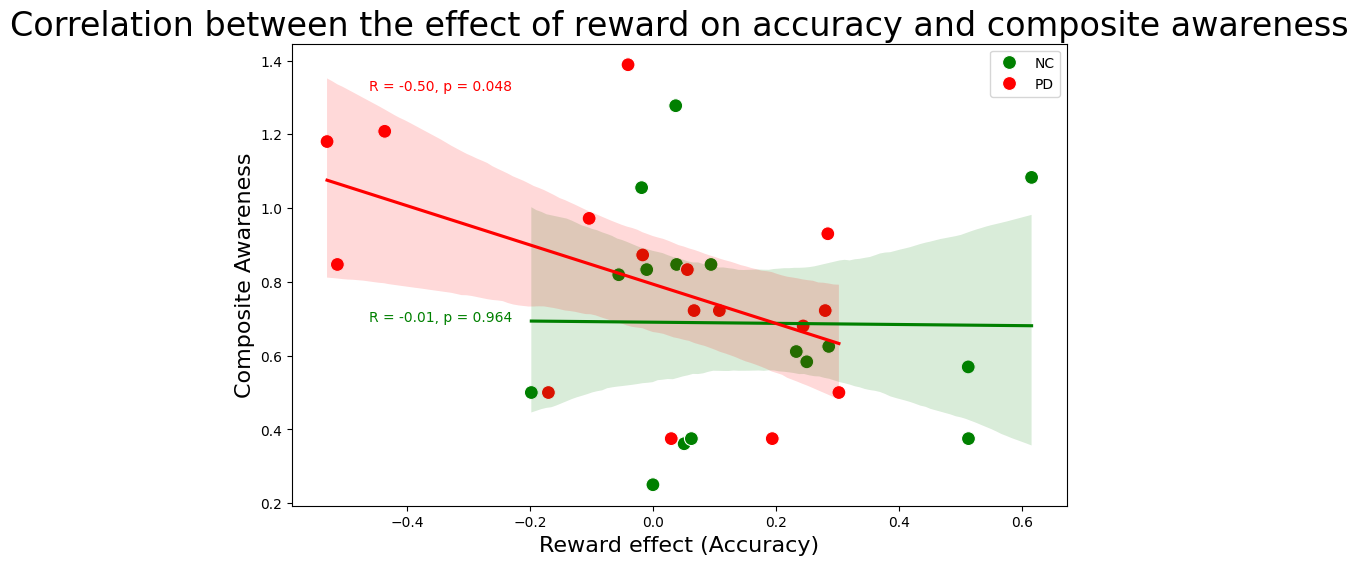

In [56]:
# Scatter plots - Accuracy Reward effect and composite awareness

# Scatter plot with best fit line for both groups
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Reward Effect', y='Composite Awareness', s = 100, hue='Group', palette = ['green','red'], data=Combined_recall)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'NC'], scatter=False, color='green', ax=ax)
sns.regplot(x='Reward Effect', y='Composite Awareness', data = Combined_recall[Combined_recall['Group'] == 'PD'], scatter=False, color='red', ax=ax)

# Details
h, l = ax.get_legend_handles_labels()
h_new = h[:2]
l_new = l[:2]
ax.legend(h_new, l_new, loc="upper right")
plt.xlabel('Reward effect (Accuracy)', fontsize = 16)
plt.ylabel('Composite Awareness', fontsize = 16)
plt.title('Correlation between the effect of reward on accuracy and composite awareness', fontsize = 24)
plt.text(0.1, 0.9, f'R = {pearson_corr_pd_acc_corr_ca:.2f}, p = {p_value_pd_acc_corr_ca:.3f}', transform=plt.gca().transAxes, color = 'r')
plt.text(0.1, 0.4, f'R = {pearson_corr_nc_acc_corr_ca:.2f}, p = {p_value_nc_acc_corr_ca:.3f}', transform=plt.gca().transAxes, color = 'g')
plt.show()

### Result: Explicit memory for rewarded pairs was not strong. However, for PD patients, the effect of reward on learning was dependent on their level of awareness: Higher awareness was associated with a lower effect of reward on learning.

## Main Conclusions: When separating the effect of reward from corrective feedback, medicated patients with PD show significanlty reduced reward learning relative to comparisons. Explicit awareness of how to obtain rewards may degrade rewarded learning in this population.